In [13]:
import os
import numpy as np
import time
from pprint import pprint

import re
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def load_dataset(data_source_filename):
    print("Loading %s... " % data_source_filename.split("/")[-1], end="")
    t = time.time()
    dataset = dict()
    with np.load(data_source_filename, allow_pickle=True) as source_file:
        for key in source_file.keys():
            # print(key)
            dataset[key] = source_file[key].tolist()
    print("done (%.1fs)" % (time.time()-t), flush=True)
    return dataset

data_source_filenames = [os.path.join('data', fn) for fn in os.listdir('data')
                            if os.path.isfile(os.path.join('data', fn)) and fn[-3:]=='npz']

In [15]:
data_source_filenames

['data/SDHK_Swedish.npz',
 'data/velux_dipl_latin.npz',
 'data/velux_facs_latin.npz',
 'data/velux_facs_danish.npz',
 'data/Colonia.npz',
 'data/SemEval2015.npz',
 'data/velux_dipl_danish.npz',
 'data/SDHK_Latin.npz']

In [16]:
def tokenize(text):
    return re.findall("\w+", text, re.UNICODE)

def collection_counts(documents):
    doc_lengths = map(lambda doc: len(doc), documents) # Number of tokens pr document
    
    words = list(word for doc in documents for word in doc)
    word_lengths = map(lambda word: len(word), words)
    
    ttr = len(set(words))/len(words)
    
    return list(doc_lengths), list(word_lengths), ttr
    

In [17]:
num_docs = list()
doc_lengths = list()
word_lengths = list()
ttrs = list()
data_source_filenames.sort()
data_source_names = [data_source_filename[data_source_filename.rfind("/")+1:data_source_filename.rfind(".")] for data_source_filename in data_source_filenames]

for data_source_filename in data_source_filenames:
    dataset = load_dataset(data_source_filename)
    dataname = data_source_filename[data_source_filename.rfind("/")+1:data_source_filename.rfind(".")]
    
    try:
        X = list(map(lambda x: tokenize(x["text"]), dataset['data']))
    except KeyError:
        X = list(map(lambda x: tokenize("\n".join([" ".join(sentence) 
                                                            for sentence in x["tokens"]])), 
                                                 dataset['data']))
        
    
    doc_length, word_length, ttr = collection_counts(X)
    
    doc_lengths.append(doc_length)
    word_lengths.append(word_length)
    num_docs.append(len(X))
    ttrs.append(ttr)

Loading Colonia.npz... done (8.6s)
Loading SDHK_Latin.npz... done (2.9s)
Loading SDHK_Swedish.npz... done (0.9s)
Loading SemEval2015.npz... done (0.3s)
Loading velux_dipl_danish.npz... done (0.0s)
Loading velux_dipl_latin.npz... done (0.0s)
Loading velux_facs_danish.npz... done (0.0s)
Loading velux_facs_latin.npz... done (0.1s)


## Collection size

In [18]:
pprint(list(zip(data_source_names, num_docs)))

[('Colonia', 99),
 ('SDHK_Latin', 7572),
 ('SDHK_Swedish', 3086),
 ('SemEval2015', 3370),
 ('velux_dipl_danish', 98),
 ('velux_dipl_latin', 358),
 ('velux_facs_danish', 98),
 ('velux_facs_latin', 358)]


## Type-to-token ratio

In [19]:
pprint(list(zip(data_source_names, ttrs)))

[('Colonia', 0.03198154829552504),
 ('SDHK_Latin', 0.06206886394765135),
 ('SDHK_Swedish', 0.10999692488328534),
 ('SemEval2015', 0.11403727637915118),
 ('velux_dipl_danish', 0.19768507354714251),
 ('velux_dipl_latin', 0.10083213336287107),
 ('velux_facs_danish', 0.2915425381793095),
 ('velux_facs_latin', 0.21909677692870239)]


## Document length

In [20]:
from scipy import stats

In [21]:
descriptions = pd.DataFrame()

for name, lengths in zip(data_source_names, doc_lengths):
    descr = pd.DataFrame({name:lengths}).describe().astype(int)
    descriptions = pd.concat([descriptions, descr], axis=1)

In [22]:
descriptions

,Colonia,SDHK_Latin,SDHK_Swedish,SemEval2015,velux_dipl_danish,velux_dipl_latin,velux_facs_danish,velux_facs_latin
count,99,7572,3086,3370,98,358,98,358
mean,48848,233,231,71,423,403,325,263
std,35680,266,173,38,197,311,157,198
min,0,9,13,4,149,98,106,67
25%,22073,105,144,43,265,215,214,148
50%,49603,158,198,64,398,315,304,204
75%,60988,258,273,92,518,467,388,307
max,218083,4960,3179,264,1045,3305,975,2027


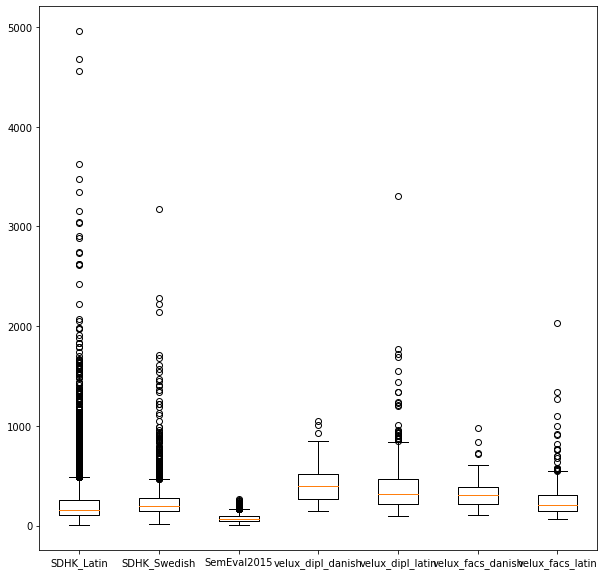

In [23]:
plt.figure(figsize=(10,10))
plt.boxplot(doc_lengths[1:], labels=data_source_names[1:])
plt.show()

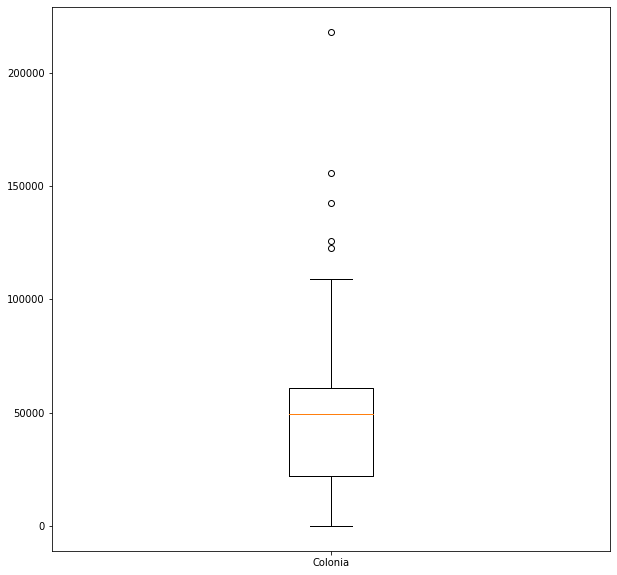

In [24]:
plt.figure(figsize=(10,10))
plt.boxplot(doc_lengths[0], labels=[data_source_names[0]])
plt.show()